# Database exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
db_df = pd.read_csv('all_data_info.csv')
print(db_df.shape)
db_df.head()

(103250, 12)


,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename
0,Barnett Newman,1955.0,abstract,15530.0,6911.0,9201912.0,wikiart,Color Field Painting,Uriel,train_only,True,102257.jpg
1,Barnett Newman,1950.0,abstract,14559.0,6866.0,8867532.0,wikiart,Color Field Painting,Vir Heroicus Sublimis,train_only,True,75232.jpg
2,kiri nichol,2013.0,NaN,9003.0,9004.0,1756681.0,NaN,Neoplasticism,NaN,test_only,False,32145.jpg
3,kiri nichol,2013.0,NaN,9003.0,9004.0,1942046.0,NaN,Neoplasticism,NaN,test_only,False,20304.jpg
4,kiri nichol,2013.0,NaN,9003.0,9004.0,1526212.0,NaN,Neoplasticism,NaN,test_only,False,836.jpg


In [3]:
db_df['artist'].nunique()

2319

In [4]:
work_count = db_df.groupby(by='artist')[['title']].count().reset_index()
work_count = work_count.rename(columns = {'title':'artwork_count'}).sort_values(by='artwork_count', ascending=False).reset_index(drop=True)
work_count = work_count.loc[work_count['artwork_count']>0]
print(work_count.shape)
work_count.head()

(2312, 2)


,artist,artwork_count
0,Ivan Shishkin,500
1,Pablo Picasso,500
2,Marc Chagall,500
3,Rembrandt,500
4,Ilya Repin,500


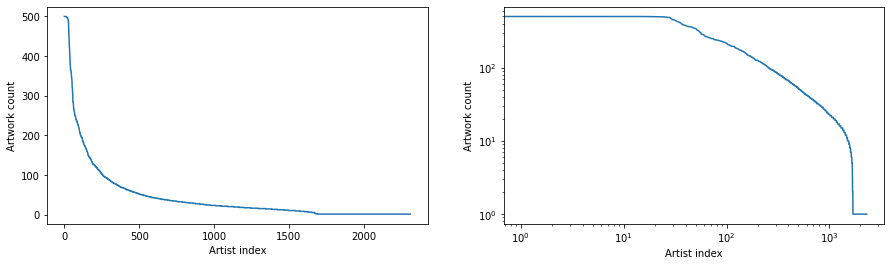

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(15,4))
for i in range(2):
    ax[i].plot(work_count.index, work_count['artwork_count'])
    if i == 1:
        ax[i].set_xscale('log')
        ax[i].set_yscale('log')
    ax[i].set_xlabel('Artist index')
    ax[i].set_ylabel('Artwork count');

In [6]:
for i in range(5):
    print(f"Number of artist between {100*i} and {100*(i+1)-1} artworks: {len(work_count.loc[np.logical_and(work_count['artwork_count']>=100*i, work_count['artwork_count']<=100*(i+1)-1)])}")
print(f"Number of artist with {500} artworks: {len(work_count.loc[work_count['artwork_count']==500])}")

Number of artist between 0 and 99 artworks: 2055
Number of artist between 100 and 199 artworks: 147
Number of artist between 200 and 299 artworks: 53
Number of artist between 300 and 399 artworks: 20
Number of artist between 400 and 499 artworks: 25
Number of artist with 500 artworks: 12
